In [1]:
# 필사 참고 링크

# https://kaggle-kr.tistory.com/17?category=868316
# 타이타닉 튜토리얼 1 - Exploratory data analysis, visualization, machine learning

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# matplotlib의 기본 scheme 말고  seaborn scheme을 세팅하면
# 일일이 graph의 font size를 지정할 필요 없이 seaborn의 font_scale을 사용할 수 있어  편함
plt.style.use('seaborn')
sns.set(font_scale=2.5)
# seaborn으로 출력한 그래프의 격자무늬를 흰 무늬로 바꿔줌
sns.set_theme(style='whitegrid')

In [4]:
import missingno as msno

In [5]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
%matplotlib inline

# **데이터 분석 작업 프로세스**
1. 데이터셋 확인
    - 대부분의 캐글 데이터는 잘 정제되어 있으나 가끔 null data존재하므로 이를 확인하고 향후 수정 필요
2. 탐색적 데이터분석(EDA)
    - 여러 feature들을 개별적으로 분석하고 feature들 간 상관관계를 확인
    - 여러 시각화 툴을 사용하여 insight 얻기
3. feature engineering
    - 모델을 선택하기 앞서, 모델의 성능을 높일 수 있도록 feature들을 engineering함.
    - one-hot encoding, class로 나누기, 구간으로 나누기, 텍스트 데이터 처리 등
4. model 만들기
    - 머신러닝 위해 sklearn을 사용해 모델 만듬
    - 딥러닝 위해 tensorflow, pytorch 사용해 모델 만듬
5. 모델 학습 및 예측
    - trainset으로 선언한 모델 학습 시킨 후, testset을 가지고 prediction
6. 모델 평가
    - 예측 성능이 원하는 수준인지 판단
    - 풀려는 문제에 따라 모델을 평가하는 방식도 달라짐
    - 학습된 모델이 어떤 것을 학습하였는지 확인

# 1. Dataset 확인

## **1.1. load**

In [7]:
train_data_path = './dataset/titanic/train.csv'
test_data_path = './dataset/titanic/test.csv'

In [8]:
df_train = pd.read_csv(train_data_path)
df_test = pd.read_csv(test_data_path)

In [9]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1.2. **각 피쳐 고유값 확인**

In [10]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
# df_train['PassengerId'].unique()

In [12]:
# df_train['Survived'].sort_values().unique()

In [13]:
# df_train['Pclass'].sort_values().unique()

In [14]:
# df_train['Name'].sort_values().unique()

In [15]:
# df_train['Sex'].sort_values().unique()

In [16]:
# df_train['Age'].sort_values().unique()

In [17]:
# df_train['SibSp'].sort_values().unique()

In [18]:
# df_train['Parch'].sort_values().unique()

In [19]:
# df_train['Ticket'].sort_values().unique()

In [20]:
# df_train['Fare'].sort_values().unique()

In [21]:
# df_train['Cabin'].sort_values().unique()

In [22]:
# df_train['Embarked'].sort_values().unique()

|변수(feature, variable)|정의|설명|타입|
|-----|-----|-----|-----|
|PassengerId|승객 번호| 고유 id|integer|
|Survived|생존 여부|target label로서 0=생존, 1=죽음|integer|
|Pclass|티켓 등급|1=1st, 2=2nd, 3=3rd 등급으로 나뉘며 categorical feature|integer|
|Name|이름|이름|string|
|Sex|성별|male=남자, female=여자로 구분되며 binary|string|
|Age|나이|continuous|integer|
|SibSp|함게 탑승한 형제, 자매 및 배우자의 수|quantitative|integer|
|Parch|함께 탑승한 부모, 아이의 수|quantitative|integer|
|Ticket|티켓 번호|alphabet + integer|string|
|Fare|탑승료|cotinuous|float|
|Cabin|객실 번호|alphabet + interger|string|
|Embarked|탑승 항구|C=Cherbourg, Q=Queenstown, S=Southampton|string|

- 데이터셋의 각 피쳐(칼럼)이 무엇을 의미하는지 미리 파악하는 게 중요

## **1.3. 기초통계량 확인**

In [23]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


- 승객의 ID값을 나타내는 'PassengerId' 칼럼의 기초통계량 count와 'Age', 'Fare'의 count가 불일치하는 것으로미루어보아 결측치가 존재하는 것을 알 수 있음

## 1.4 Null data check

In [25]:
df_train.agg(lambda x: sum(x.isnull()) / len(df_train))

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [26]:
df_test.agg(lambda x: sum(x.isnull()) / len(df_test))

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

- missingno(msno) 라이브러리를 사용하여 null data 쉽게 보기

<AxesSubplot:>

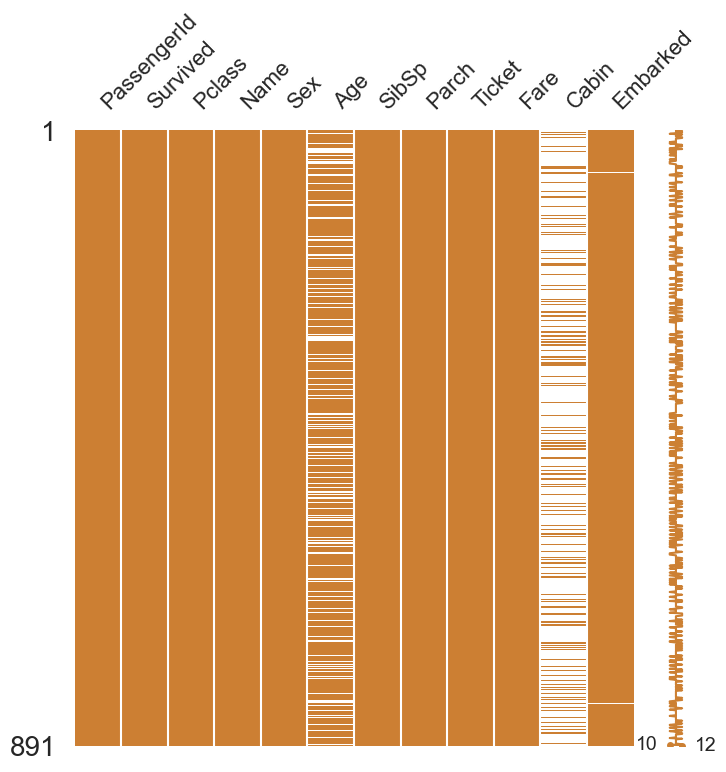

In [27]:
msno.matrix(df=df_train, figsize=(8, 8), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

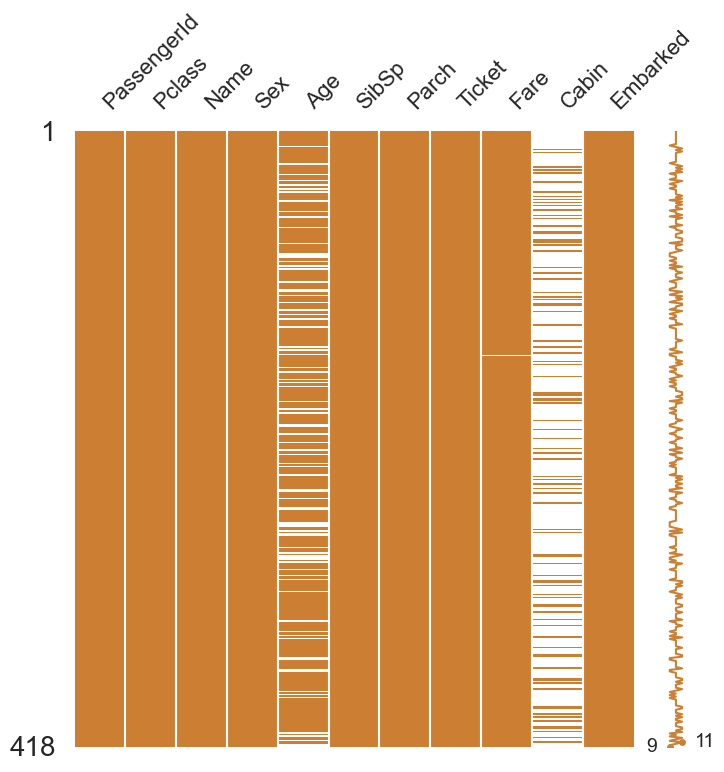

In [67]:
msno.matrix(df=df_test, figsize=(8, 8), color=(0.8, 0.5, 0.2))

## **1.5. Target label 확인**

- target label이 어떤 distribution을 가지고 있는지 확인
- 현 데이터셋과 같이 binary classification 문제의 경우 1과 0의 분포에 따라 모델의 평가방법이 달라짐

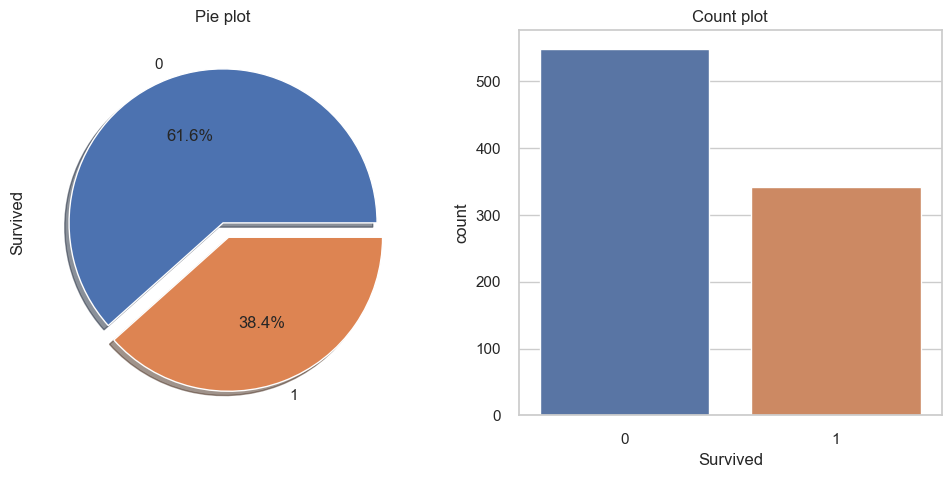

In [64]:
f, ax = plt.subplots(1, 2, figsize=(12, 5))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1],
                                             autopct='%1.1f%%',
                                             shadow=True,
                                             ax=ax[0])
ax[0].set_title('Pie plot')

sns.countplot(data=df_train, x='Survived', ax=ax[1])
ax[1].set_title('Count plot')

plt.show()

# **2. Exploratory Data Analysis(EDA)**

- 데이터 안에 숨겨진 사실을 찾기 위해선 적절한 시각화가 필요
- 특정 목적에 맞는 소스코드를 정리해두어 필요할때마다 참고해서 적용할 것

## **2.1. Pcalss**

- categorical & ordinal data
- Pclass에 따른 생존률 차이 살펴보기

In [30]:
# Pcalss 별 탑승객 수
df_train[['Pclass', 'Survived']].groupby(['Pclass']).count()

,Survived
Pclass,
1,216
2,184
3,491


In [31]:
# Pclass 별 생존자 수
df_train[['Pclass', 'Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [32]:
# Pcalss 별 생존률
df_train[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [33]:
# 위의 과정을 쉽게 보기
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot:xlabel='Pclass'>

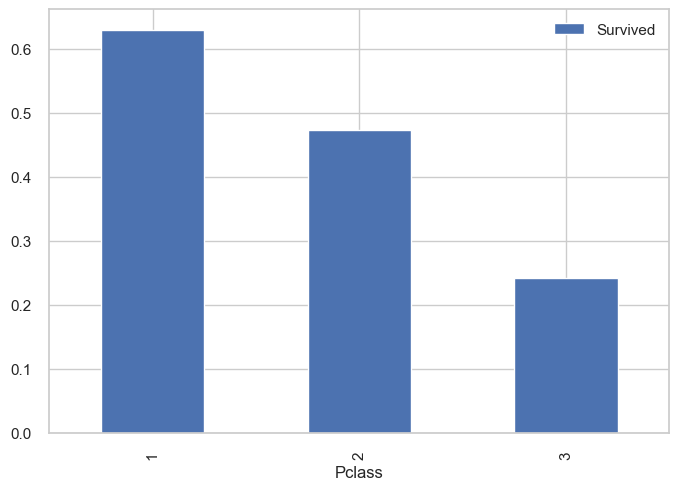

In [34]:
df_train[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False).plot.bar()

- 보이는 바와 같이 Pclass가 좋을수록(1>2>3) 생존률이 높은 것을 확인 할 수 있음

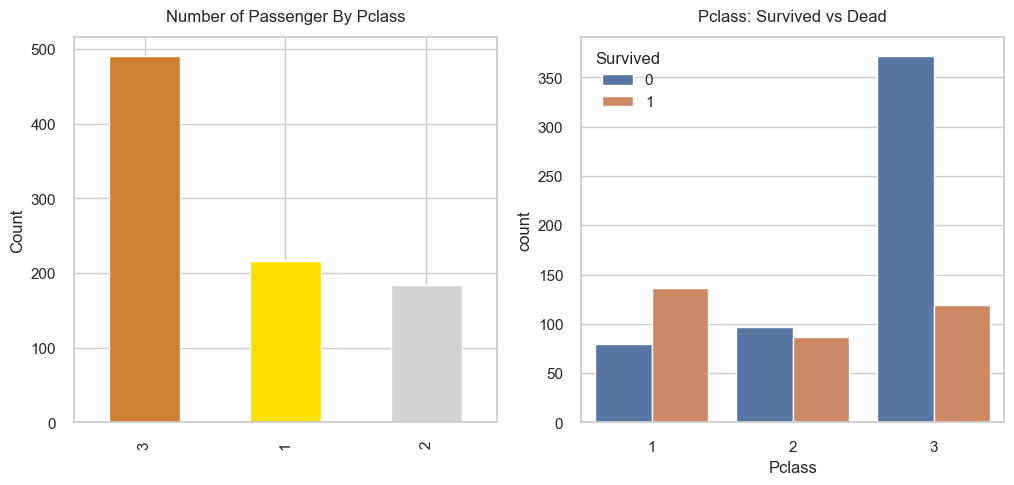

In [63]:
y_position = 1.02
_, ax = plt.subplots(1, 2, figsize=(12, 5))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'],
                                           ax=ax[0])
ax[0].set_title('Number of Passenger By Pclass', y=y_position)
ax[0].set_ylabel('Count')

# hue는 색을 의미하며, 각 범주형 데이터를 색상으로 구분해줌
sns.countplot(data=df_train, x='Pclass', hue='Survived', ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)

plt.show()

- 클래스가 높을수록 생존확률이 높음
- 이를 통해 생존에 Pclass가 큰 영향을 미친다고 추측할 수 있으며, 나중에 모델링 수행 시 이 feature를 사용하면 좋을 것이라 기대할 수 있음

## **2.2. Sex**

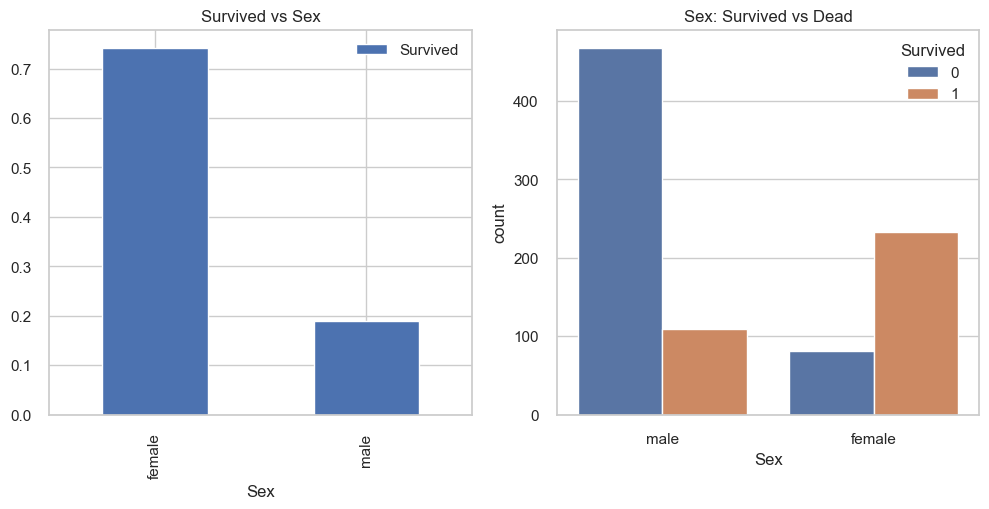

In [54]:
_, ax = plt.subplots(1, 2, figsize=(12, 5))
df_train[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot(data=df_train, x='Sex', hue='Survived', ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

plt.show()

- 여자가 남자보다 생존할 확률이 높은 것이 확인 됨

In [37]:
df_train[['Sex', 'Survived']].groupby(['Sex']).mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [38]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


- Pclass와 마찬가지로, Sex도 예측 모델에 쓰일 중요한 feature임을 확인할 수 있음

## 2.3. Both Sex and Pclass

- 이번에는 Sex, Pclass 두 피쳐를 동시에 분석하여 생존이 어떻게 달라지는지 확인
- seaborn의 catorplot을 이용하면, 손쉽게 3개의 차원으로 이루어진 그래프를 그릴 수 있음

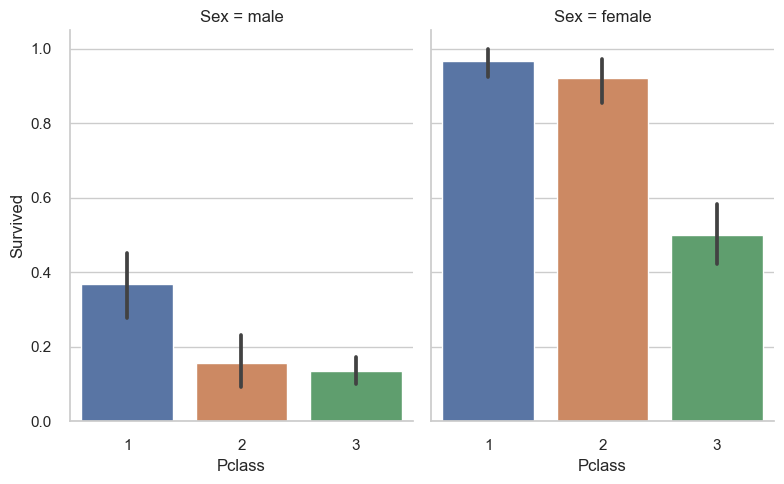

In [69]:
sns.catplot(data=df_train, kind='bar', x='Pclass', y='Survived', col='Sex', aspect=0.8)

- 모든 클래스에서 female의 생존 확률이 높은 것을 확인할 수 있음
- 또한 남자, 여자 모두 클래스가 높을수록 살 확률이 높음

## **2.4 Age**

In [77]:
print('제일 나이 많은 탑승객 : {:.1f} 세'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))
print('탑승객 중간 나이 : {:.1f} Years'.format(df_train['Age'].median())) 

제일 나이 많은 탑승객 : 80.0 세
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years
탑승객 중간 나이 : 28.0 Years


- 생존에 따른 Age의 커널 밀도 추정(KDE: Kernel Density Estimator)
- 히스토그램은 구간 설정에 따라 결과물 해석에 영향을 줄 수 있어 대안으로 사용하는 그래프

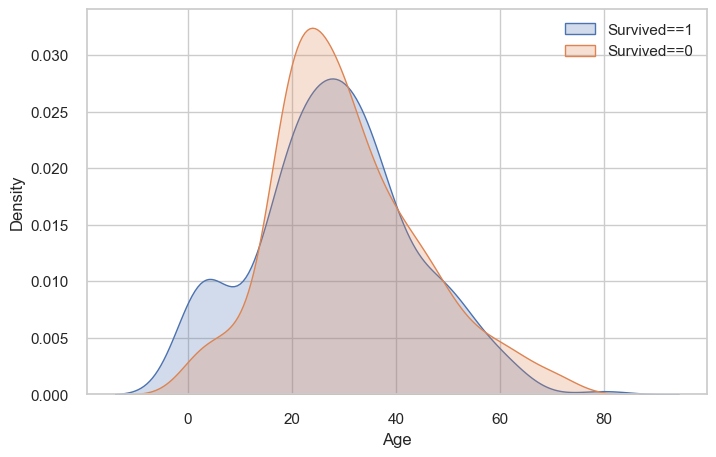

In [85]:
_, ax = plt.subplots(1, 1, figsize=(8, 5))
sns.kdeplot(df_train['Age'][df_train['Survived']==1], ax=ax, shade=True)
sns.kdeplot(df_train['Age'][df_train['Survived']==0], ax=ax, shade=True)
plt.legend(['Survived==1', 'Survived==0'])
plt.show()

- 10살 미만의 아이들의 경우 사상자수보다 생존자 수의 비중이 큼

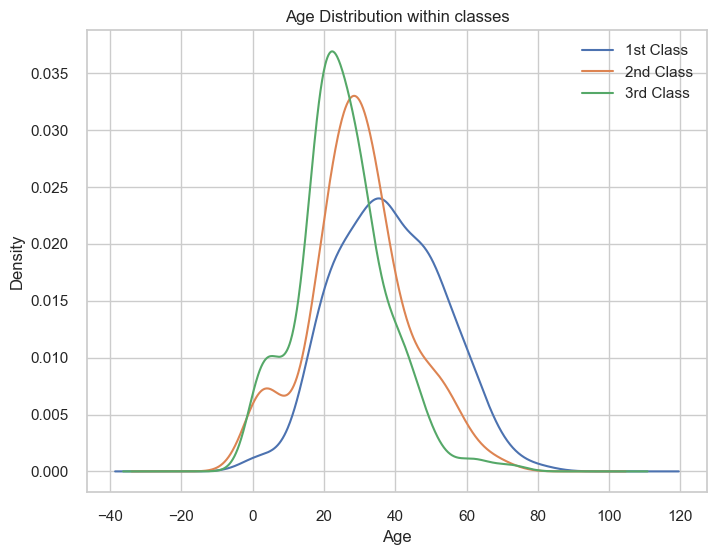

In [89]:
# Age distribution within classes
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

- Class가 높을수록 나이 많은 사람의 비중이 커짐

Text(0.5, 0, 'Range of Age(0~x)')

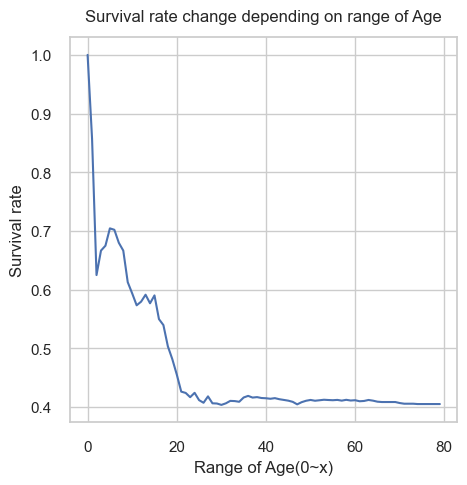

In [110]:
cummulate_survival_ratio = []
for i in range(1, int(df_train['Age'].max())+1):
    cummulate_survival_ratio.append(df_train['Survived'][df_train['Age'] < i].sum() / len(df_train['Survived'][df_train['Age'] < i]))
    
plt.figure(figsize=(5, 5))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')

- 나이가 어릴수록 생존률이 높은 것이 확인됨
- 나이가 중요한 feagture로 쓰일 수 있음을 확인

## **2.5. Pclass, Sex, Age**

- 앞서 주요 feature로 선택한 세 변수에 대해 시각화하여 인사이트 추출